In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')

# 이 분석에서는 test 셋의 예측결과를 확인할 수 없기 때문에(competition에 제출하지 않기 때문에)
# test 셋은 제외하도록 한다.
#df_test = pd.read_csv('test.csv')

<ipython-input-61-51337a743f4b>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


# 1. 기술 통계 및 추정

### 1) 데이터셋의 전체 구조 파악

In [62]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [64]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [65]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### 2) 기술 통계량 확인

In [66]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [67]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### 3) 결측치 및 중복데이터 탐색, 처리

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


df_train - 결측치 없음


In [69]:
df_train[df_train.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [70]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


df_store 결측치 컬럼: CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval


In [71]:
# 결측치가 3개 포함된 CompetitionDistance 컬럼만 제외하고 나머지 컬럼은 제거하기로 한다.
df_store.drop(columns=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], inplace=True)

# 확인
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1112 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


In [72]:
# 결측치가 3개 포함된 CompetitionDistance 컬럼 확인
df_store[df_store['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,Promo2
290,291,d,a,NaN,0
621,622,a,c,NaN,0
878,879,d,a,NaN,1


In [73]:
# 해당 경쟁 업체에 대한 정보가 없기 떄문에 Max 으로 채워 넣기로 결정(참고: https://www.kaggle.com/code/muskan0907/rossman-sales)
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].max(), inplace=True)

# 확인
df_store[df_store['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,Promo2


In [74]:
# df_store 컬럼 중복데이터 확인
df_store[df_train.duplicated()]

<ipython-input-74-37352ec19708>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_store[df_train.duplicated()]


,Store,StoreType,Assortment,CompetitionDistance,Promo2


### 4) 탐색적 데이터 분석
: 데이터 분포 확인, 시각화, 이상치 탐색 및 처리

In [75]:
# df_train 데이터와 df_store 데이터를 on = 'Store' 기준으로 left join
df = df_train.merge(df_store, on='Store', how='left')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


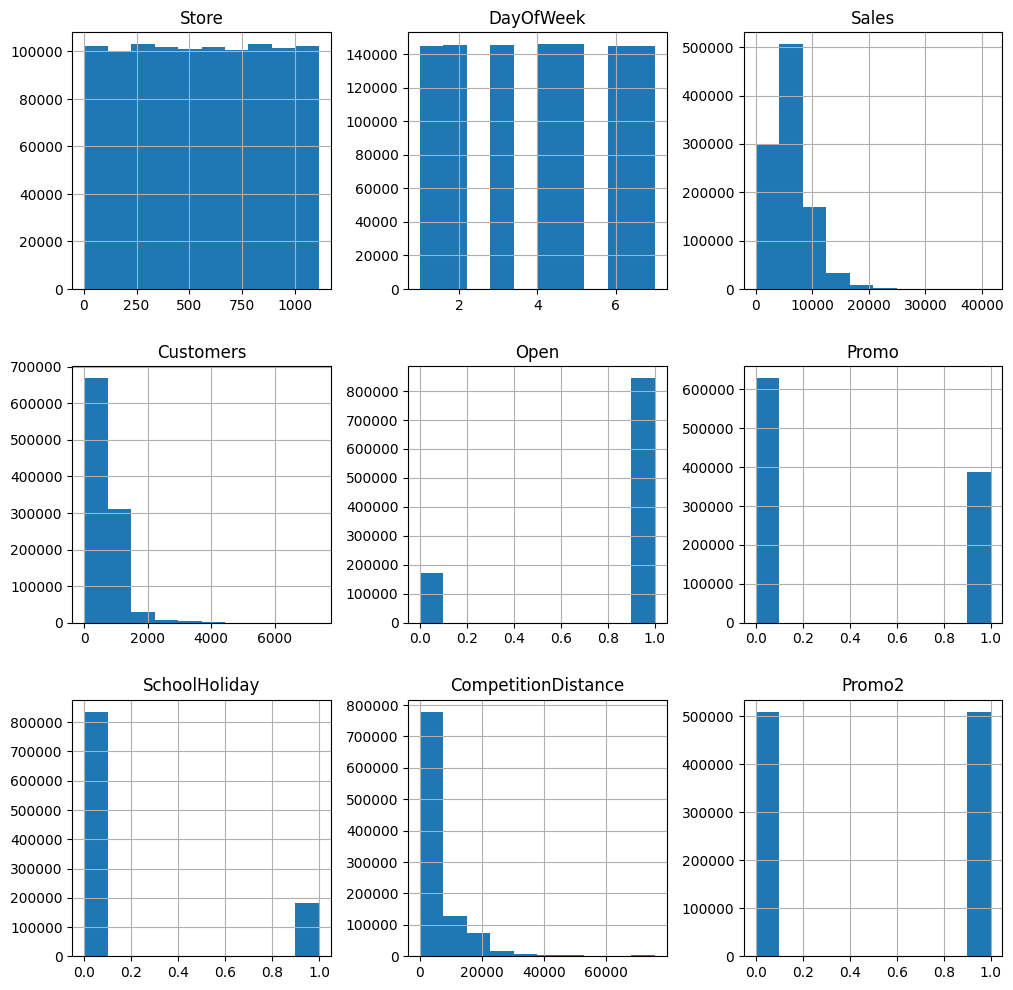

In [77]:
df.hist(figsize=(12,12));

## Store 변수 탐색

In [78]:
# Store 변수를 범주형으로 변환
df['Store'] = df['Store'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Store                1017209 non-null  category
 1   DayOfWeek            1017209 non-null  int64   
 2   Date                 1017209 non-null  object  
 3   Sales                1017209 non-null  int64   
 4   Customers            1017209 non-null  int64   
 5   Open                 1017209 non-null  int64   
 6   Promo                1017209 non-null  int64   
 7   StateHoliday         1017209 non-null  object  
 8   SchoolHoliday        1017209 non-null  int64   
 9   StoreType            1017209 non-null  object  
 10  Assortment           1017209 non-null  object  
 11  CompetitionDistance  1017209 non-null  float64 
 12  Promo2               1017209 non-null  int64   
dtypes: category(1), float64(1), int64(7), object(4)
memory usage: 102.9+ MB


In [79]:
# 총 1115 개의 매장
df['Store'].nunique()

1115

In [80]:
# 매장별 총 매출
gb_s = df.groupby('Store')['Sales'].sum()
gb_s

Store
1        3716854
2        3883858
3        5408261
4        7556507
5        3642818
          ...   
1111     4091076
1112     7974294
1113     5196242
1114    16202585
1115     4922229
Name: Sales, Length: 1115, dtype: int64

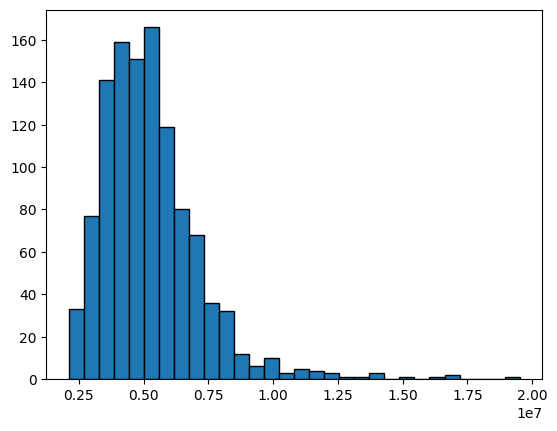

In [81]:
# 매장별 총 매출 시각화
plt.hist(gb_s, bins=30, edgecolor='black');

ㄴ 매장별 총 매출 히스토그램은 right-skewed 왜도를 보임. 전체적으로 정규분포를 따르는 것으로 보이지만 유독 매출이 높은 몇몇 매장이 있음을 알 수 있다.

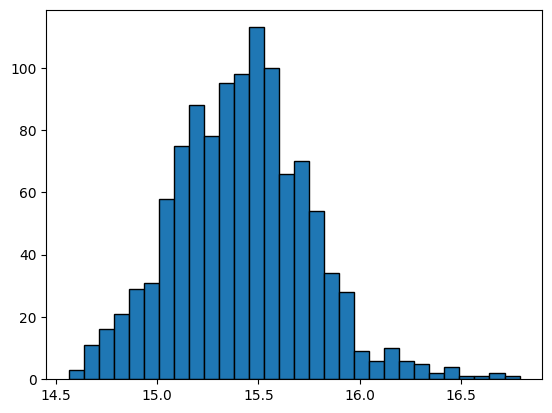

In [82]:
# 로그 변환
gb_s["Sales_log"] = np.log(gb_s + 1)

# 시각화
plt.hist(gb_s["Sales_log"], bins=30, edgecolor='black');

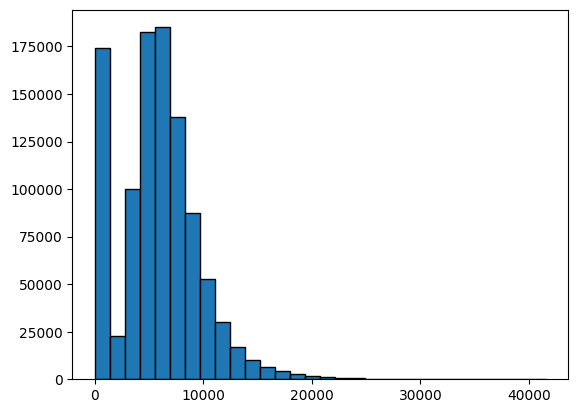

In [83]:
# 전체 데이터 판매량 시각화
plt.hist(df['Sales'], bins=30, edgecolor='black');

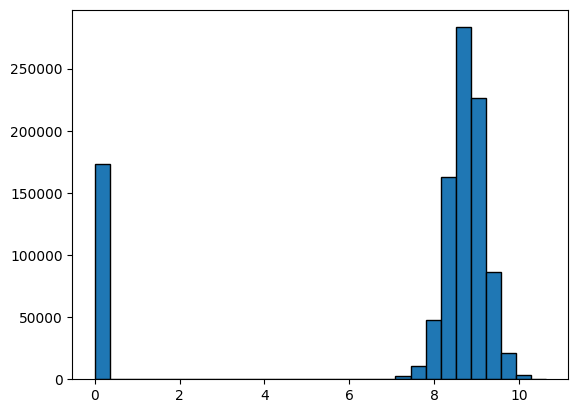

In [84]:
# 전체 데이터 판매량 로그 변환 및 시각화
df["Sales_log"] = np.log(df['Sales'] + 1)

plt.hist(df['Sales_log'], bins=30, edgecolor='black');

ㄴ 판매량이 0 인 날도 포함됨을 확인했으며 아마 휴일일 것으로 생각됨. 로그 변환된 평일 매출은 대략적으로 정규분포를 따르는 것으로 보임

In [85]:
# 매장에 따른 일별 평균 수익
gb_s['Sales_means'] = df.groupby('Store')['Sales'].mean()

# 전체 데이터 평균 수익
df['Sales'].mean()

5773.818972305593

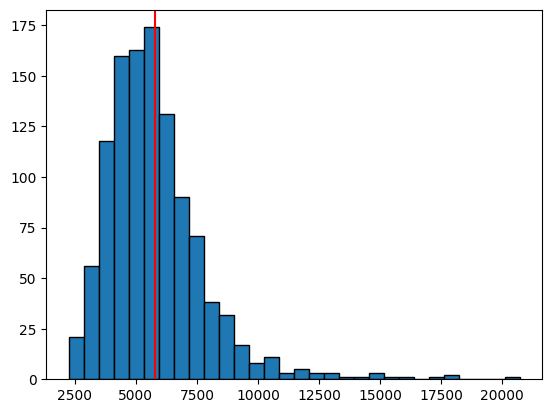

In [86]:
# 시각화
plt.hist(gb_s['Sales_means'], bins=30, edgecolor='black')

# 전체 데이터 평균 수익
plt.axvline(df['Sales'].mean(), c='red');

## Date 변수 탐색

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Store                1017209 non-null  category
 1   DayOfWeek            1017209 non-null  int64   
 2   Date                 1017209 non-null  object  
 3   Sales                1017209 non-null  int64   
 4   Customers            1017209 non-null  int64   
 5   Open                 1017209 non-null  int64   
 6   Promo                1017209 non-null  int64   
 7   StateHoliday         1017209 non-null  object  
 8   SchoolHoliday        1017209 non-null  int64   
 9   StoreType            1017209 non-null  object  
 10  Assortment           1017209 non-null  object  
 11  CompetitionDistance  1017209 non-null  float64 
 12  Promo2               1017209 non-null  int64   
 13  Sales_log            1017209 non-null  float64 
dtypes: category(1), float64(2), int64(

In [88]:
# # Date 컬럼을 datetime 타입으로 변환.
# df_train['Date'] = pd.to_datetime(df_train['Date'])
# df_train['Date']

In [89]:
# 매장별 시간에 따른 매출 추이 시각화(출처: https://www.kaggle.com/code/omarelgabry/a-journey-through-rossmann-stores)

# Year, Month 컬럼 생성
df['Year']  = df['Date'].apply(lambda x: int(str(x)[:4]))
df['Month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))

# Year_Month 컬럼에 Year-Month-Day 대신 Year-Month 할당
df['Year_Month'] = df['Date'].apply(lambda x: (str(x)[:7]))

# Date 컬럼으로 그룹화 하여 평균 판매량과 precent change 를 구함
average_sales    = df.groupby('Year_Month')["Sales"].mean()
pct_change_sales = df.groupby('Year_Month')["Sales"].sum().pct_change()

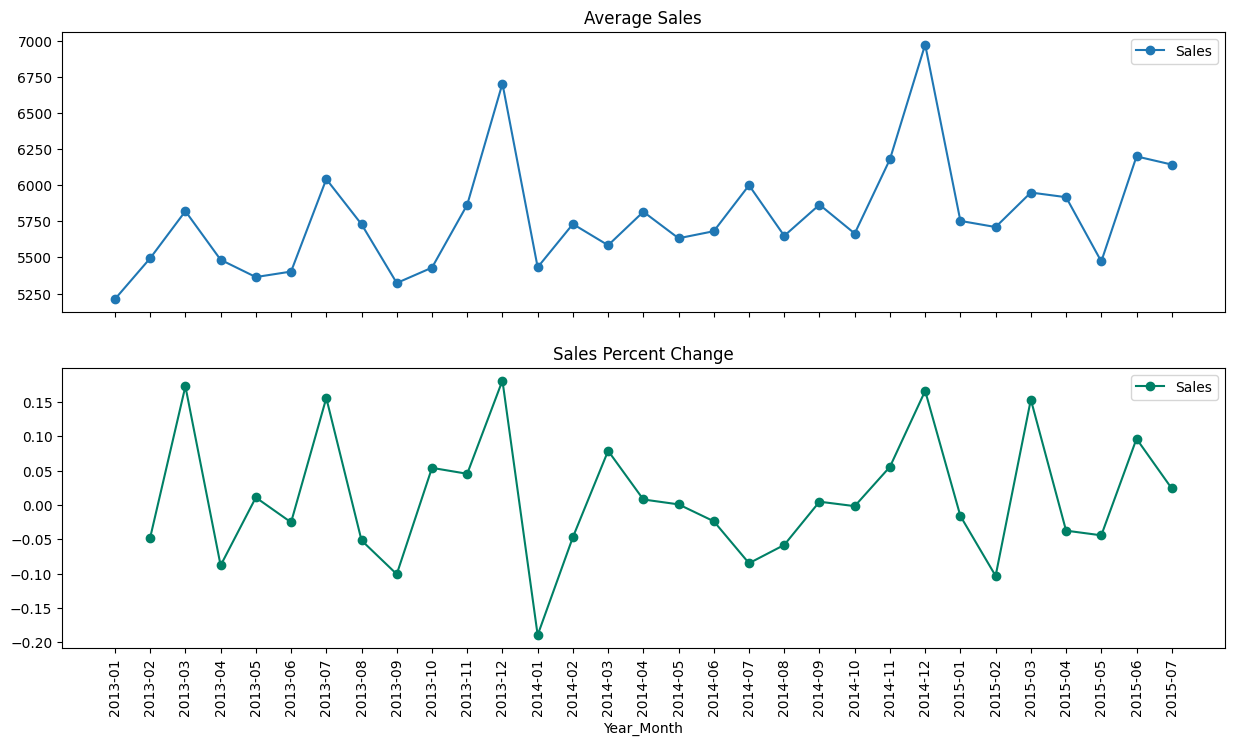

In [90]:
# 시각화
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# 평균 판매량을 연월 기준으로 시각화
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# 연월에 따른 판매량의 precent change 시각화
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

ㄴ 주어진 기간의 데이터를 보면 대략 12월에 평균 판매량이 급격히 증가한 후 1-2월에 급격히 감소하는 특징을 확인할 수 있다.

## 매장별 전체 기간의 CompetitionDistance 속성 탐색

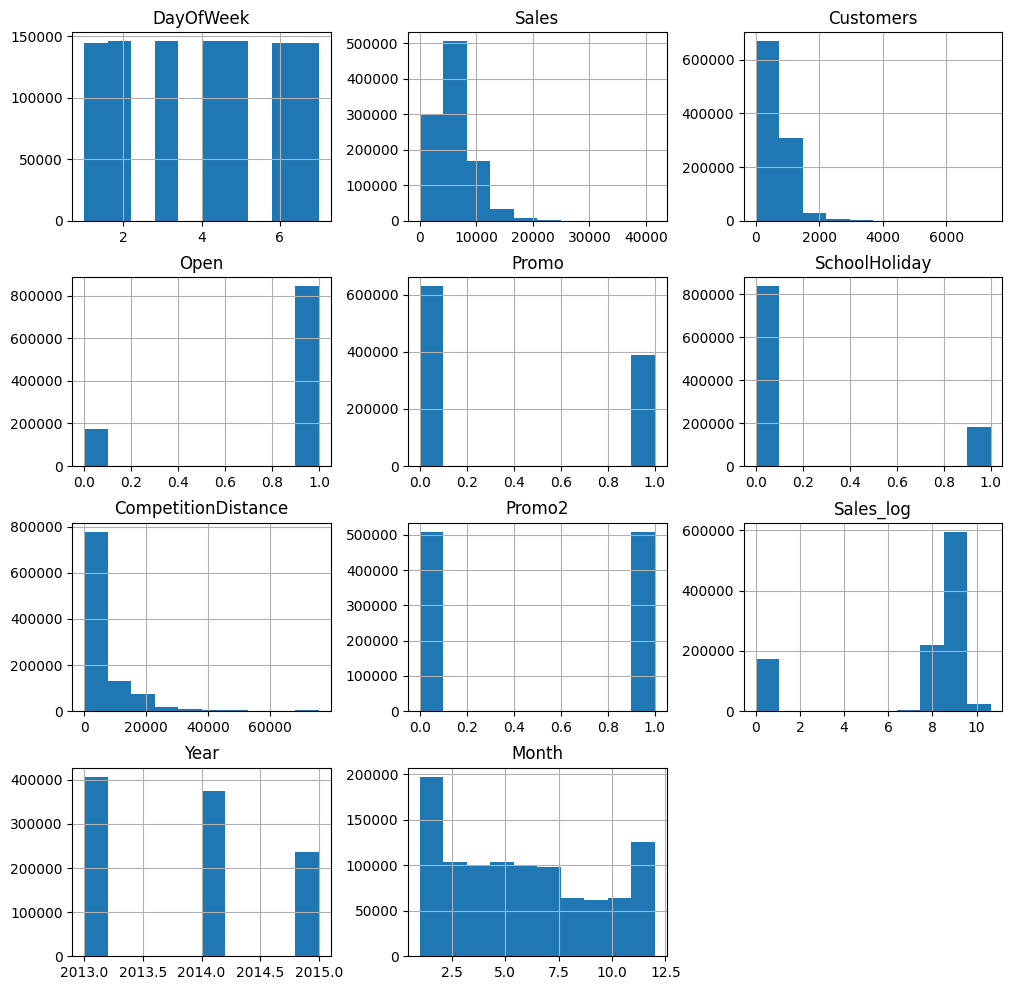

In [91]:
df.hist(figsize=(12,12));

In [92]:
# 매장별 경쟁업체와의 거리
gb_s['CompetitionDistance_mean'] = df.groupby('Store')['CompetitionDistance'].mean()
gb_s['CompetitionDistance_mean']

Store
1        1270.0
2         570.0
3       14130.0
4         620.0
5       29910.0
         ...   
1111     1900.0
1112     1880.0
1113     9260.0
1114      870.0
1115     5350.0
Name: CompetitionDistance, Length: 1115, dtype: float64

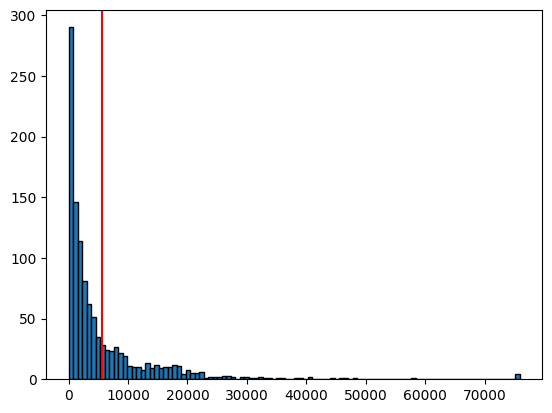

In [93]:
# 매장별 경쟁업체와의 거리 시각화
plt.hist(gb_s['CompetitionDistance_mean'], bins=100, edgecolor='black');

# 전체 데이터 경쟁업체와의 거리
plt.axvline(df['CompetitionDistance'].mean(), c='red');

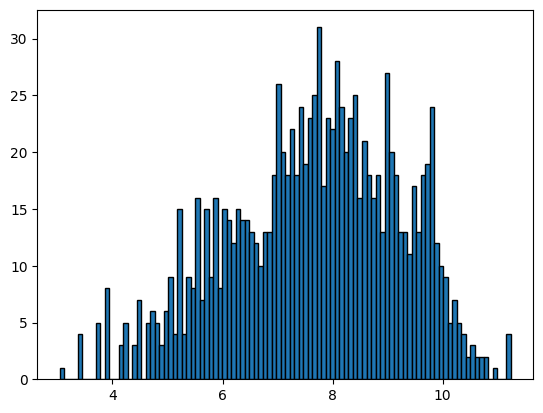

In [94]:
# 로그 변환
gb_s["CompetitionDistance_mean_log"] = np.log(gb_s['CompetitionDistance_mean'] + 1)

# 시각화
plt.hist(gb_s["CompetitionDistance_mean_log"], bins=100, edgecolor='black');

ㄴ 매장별 경쟁 업체와의 평균 거리를 로그 변환으로 시각화 해보면 평균이 0 이 아닌 점을 확인할 수 있다.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Store                1017209 non-null  category
 1   DayOfWeek            1017209 non-null  int64   
 2   Date                 1017209 non-null  object  
 3   Sales                1017209 non-null  int64   
 4   Customers            1017209 non-null  int64   
 5   Open                 1017209 non-null  int64   
 6   Promo                1017209 non-null  int64   
 7   StateHoliday         1017209 non-null  object  
 8   SchoolHoliday        1017209 non-null  int64   
 9   StoreType            1017209 non-null  object  
 10  Assortment           1017209 non-null  object  
 11  CompetitionDistance  1017209 non-null  float64 
 12  Promo2               1017209 non-null  int64   
 13  Sales_log            1017209 non-null  float64 
 14  Year                 1017209 non-n

# 2. 추정

1) Store 컬럼을 1 매장만을 표본으로 모집단에 대한 추정을 실행


2) 모집단은 1 매장의 더 큰 기간 동안의 매출액


3) 검정 통계량은 일일 평균 매출액으로 정함


4) 주어진 1 매장의 표본을 부트스트랩 방식으로 1000 개의 표본을 복원추출하여 귀무분포 생성


5) 귀무분포와 1 매장 데이터를 가지고 모집단의 일일평균 매출액에 대한 신뢰구간을 시각화

6) 결과 해석

In [104]:
# 1. 1 매장 판매액 데이터만 추출
store_1 = df[df['Store'] == 1]['Sales']
store_1

0          5263
1115       5020
2230       4782
3345       5011
4460       6102
           ... 
1011635    4997
1012750    4486
1013865    4327
1014980    5530
1016095       0
Name: Sales, Length: 942, dtype: int64

In [106]:
# 2. 1 매장 데이터로 부트스트랩 실행
sample_means = []
n_samples = 1000  # 1000개의 부트스트랩 표본
sample_size = len(store_1)   # store_1 와 같은 표본 크기

for _ in range(n_samples):
    bootstrap_sample_mean = np.mean(store_1.sample(n = sample_size, replace = True))
    sample_means.append(bootstrap_sample_mean)

len(sample_means)

1000

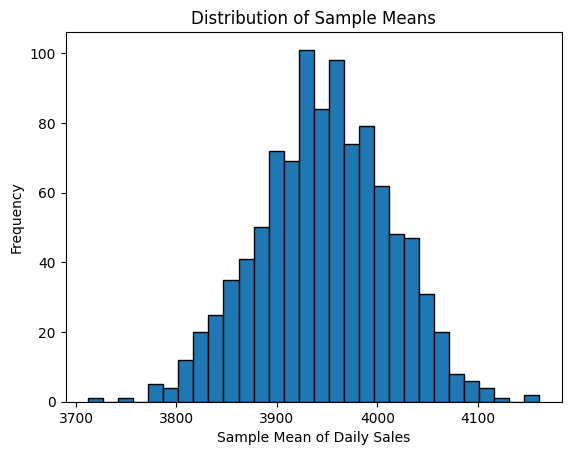

In [107]:
# 3. 부트스트랩 분포 시각화
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean of Daily Sales')
plt.ylabel('Frequency')
plt.show()

In [125]:
# 4. 부트스트랩 결과를 가지고 신뢰구간 계산

# 부트스트랩 분포의 평균
bootstrap_mean = sum(sample_means) / len(sample_means)

# 부트스트랩 분포의 표준오차
bootstrap_standard_error = np.sqrt(sum((sample_means - bootstrap_mean)**2) / (n_samples - 1))

# 신뢰수준 설정
confidence_level = 0.95

# 신뢰구간 계산
lower_bound = np.percentile(sample_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(sample_means, (1 + confidence_level) / 2 * 100)
confidence_interval = (lower_bound, upper_bound)

bootstrap_mean, bootstrap_standard_error, confidence_interval

(3946.839249469219, 65.09190127620613, (3817.8137473460724, 4067.749601910828))

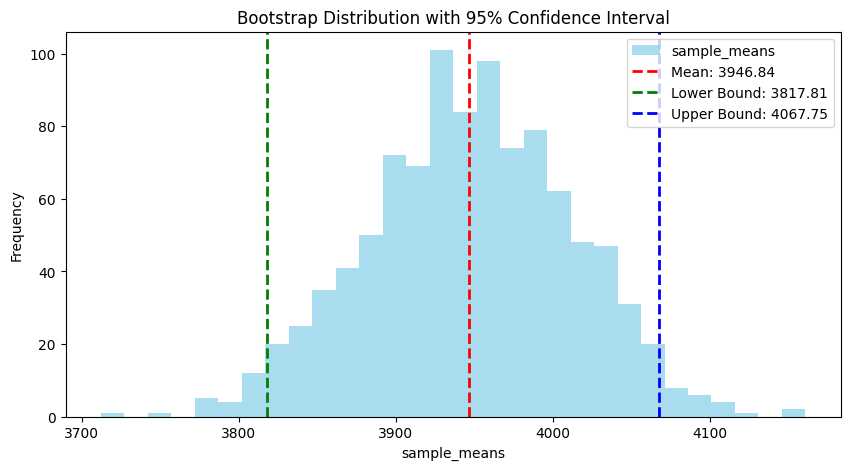

In [126]:
# 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, color='skyblue', alpha=0.7, label='sample_means')
plt.axvline(bootstrap_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {bootstrap_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('sample_means')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution with 95% Confidence Interval')
plt.legend()
plt.show()

ㄴ 신뢰구간 결과 해석
: 95% 신뢰수준에서, 독일 Rossmann 1 매장의 전체 기간 일일 평균 매출액은 3818 ~ 4068 사이에 위치한다.

# 3. 검정


: 1115개의 독일 Rossman 매장 중 총 매출액 상위 5개의 매장에 대하여 매출 평균의 차이가 통계적으로 유의미한지 알기 위해 ANOVA 검정을 수행하기로 한다.


In [135]:
# 1. 총 매출 상위 5개 매장 확인
top5_store = df.groupby('Store')['Sales'].mean().sort_values(ascending=False).head(5)
top5_store

Store
262     20718.515924
817     18108.139066
562     17969.556263
1114    17200.196391
251     15814.087049
Name: Sales, dtype: float64

In [175]:
# 2. 상위 5개 매장의 매출액 시각화 준비
top5_df = df[df['Store'].isin(top5_store.index)]
top5_df = top5_df[['Store', 'Sales']]
top5_df['Store'] = top5_df['Store'].astype(str)
top5_df

# top5_df_gb = top5_df.groupby('Store')['Sales']

,Store,Sales
250,251,22205
261,262,25774
561,562,20303
816,817,23093
1113,1114,27508
...,...,...
1016345,251,0
1016356,262,17267
1016656,562,8498
1016911,817,0


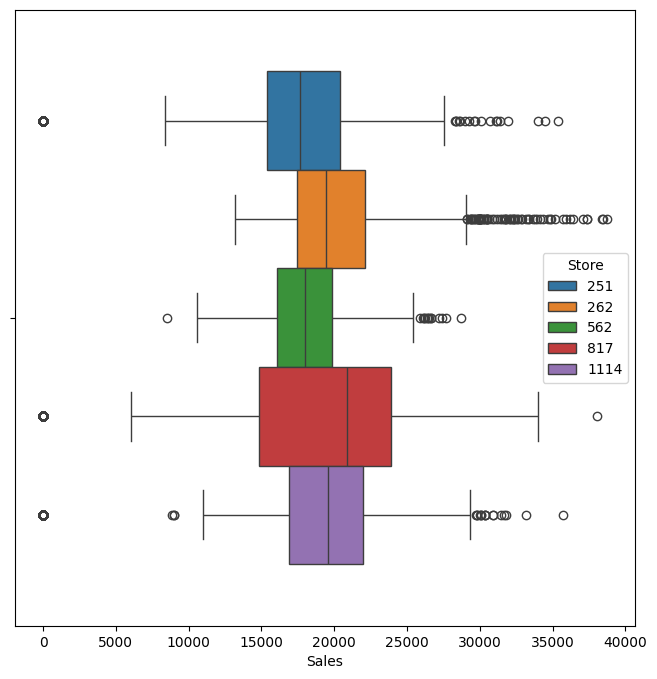

In [177]:
# 3. 박스플롯으로 분산의 차이를 확인하기 위한 시각화
plt.figure(figsize=(8, 8))
sns.boxplot(data=top5_df, x='Sales', hue='Store');

ㄴ 눈으로 보았을 때 분산의 차이를 크게 우려하지 않아도 될 듯하다. ANOVA 분석을 진행한다.

1. 귀무가설: 독일 Rossmann 의 총 매출액 상위 5개 매장 사이 평균 매출액의 차이는 없다.
2. 대립가설: 독일 Rossmann 의 총 매출액 상위 5개 매장 중 적어도 하나의 평균 매출액에 차이가 있다.

In [179]:
# 4. ANOVA 검정 수행
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Sales ~ C(Store)', data = top5_df).fit()
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Store),1.207048e+10,4.0,61.053699,2.335411e-50
Residual,2.325477e+11,4705.0,NaN,NaN


ㄴ 검정 결과 해석:
1. F 통계량은 61, p값은 0 에 근사한 결과를 확인하였다.
2. F 통계량 61 은 자유도가 4인 F-분포에서 p값이 0에 근사한 결과로 통계적으로 유의미한 결과이다.
3. 따라서 귀무가설을 기각하고, 상위 5개의 매장 중 적어도 하나는 매출액 평균에 차이가 통계적으로 유의미하다는 결론을 내린다.
4. 이러한 데이터를 근거로 상위 5개의 매장을 분석하여 경쟁력의 차이에 어떤 요인이 영향을 미칠 수 있는지 추가적인 분석을 진행할 수 있다.

# 4. 회귀 분석

In [189]:
# 0. Store 컬럼은 int 형으로 바꿔 회귀를 진행. 1114개의 더미 변수는 너무 많기 때문
df['Store'] = df['Store'].astype(int)

In [197]:
# 1. 회귀에 불필요한 컬럼 제거 - Year_Month, Sales_log, Date
df = df.drop(['Date', 'Year_Month', 'Sales_log'], axis=1)
df.head(1)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7


<ipython-input-198-16f573fea915>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm',


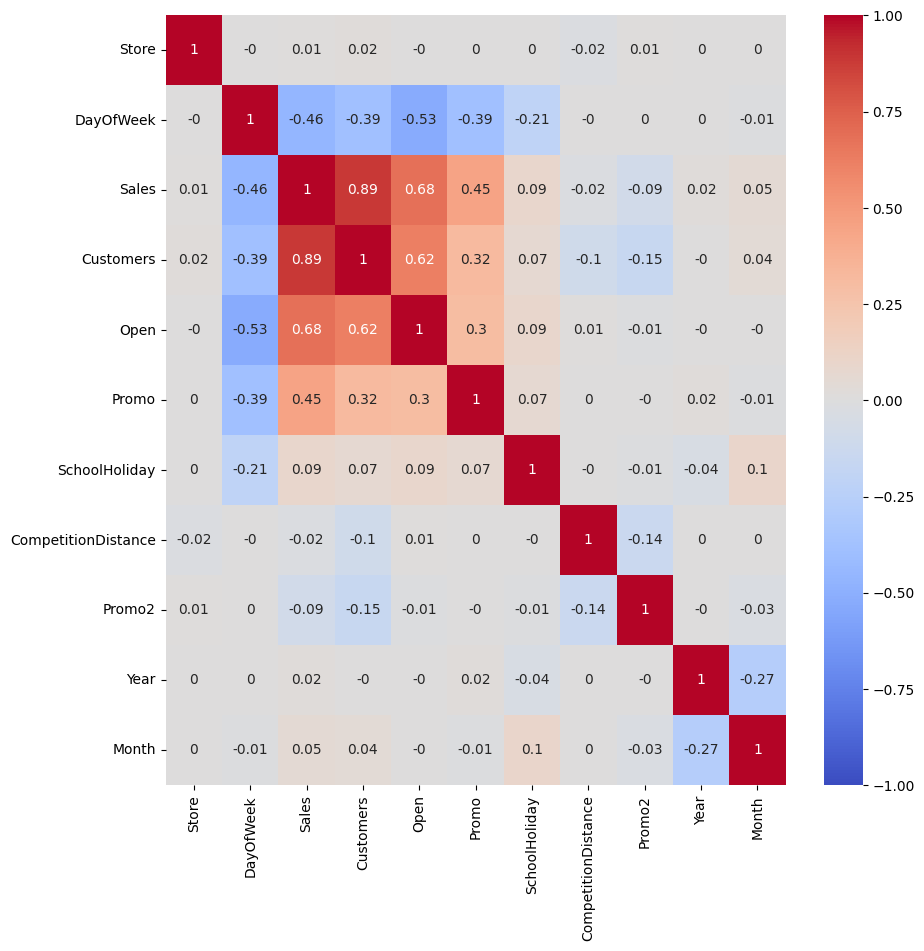

In [198]:
# 2. 회귀 분석에 앞서 상관관계 분석 시행. 다중공선성 문제 확인

# 시각화
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm',
            #mask=np.triu(ones),
            vmin=-1, vmax=1);

ㄴ Open 변수는 DayOfWeek 변수와 Customers 변수에 대해 비교적 높은 상관관계를 보인다. 굳이 넣지 않아도 될 것 같다고 생각하여 예측변수에서 제거하기로 한다.

In [199]:
# Open 변수 제거
df = df.drop('Open', axis=1)
df.head(1)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month
0,1,5,5263,555,1,0,1,c,a,1270.0,0,2015,7


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Promo                1017209 non-null  int64  
 5   StateHoliday         1017209 non-null  object 
 6   SchoolHoliday        1017209 non-null  int64  
 7   StoreType            1017209 non-null  object 
 8   Assortment           1017209 non-null  object 
 9   CompetitionDistance  1017209 non-null  float64
 10  Promo2               1017209 non-null  int64  
 11  Year                 1017209 non-null  int64  
 12  Month                1017209 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 108.6+ MB


In [203]:
# 4. 스케일링 진행 (참고: https://www.kaggle.com/code/muskan0907/rossman-sales)
from sklearn.preprocessing import MinMaxScaler

# 스케일링을 위한 수치형 컬럼 지정
numeric_cols = ['Store', 'DayOfWeek', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Year', 'Month']

# MinMaxScaler 사용
scaler= MinMaxScaler().fit(df[numeric_cols])
df[numeric_cols]=scaler.transform(df[numeric_cols])
df[numeric_cols].describe().loc[['min', 'max']]

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [204]:
# 5. 회귀에 사용할 예측변수, 반응변수 설정
predictors = ['Store', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month']
outcome = 'Sales'

# 6. get_dummies 함수로 명목형 변수 인코딩, drop_first 로
X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)

df_full = sm.OLS(df[outcome], X.assign(const=1))
results = df_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 4.231e+04
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:55:15   Log-Likelihood:            -9.5692e+06
No. Observations:             1017209   AIC:                         1.914e+07
Df Residuals:                 1017191   BIC:                         1.914e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Store                  71.0788    

ㄴ 해석


1. R-squared 값은 0.414 로 이는 주어진 예측변수들이 종속변수 Sales 의 분산을 약 41% 설명한 것이다.


2. 모든 예측변수의 p값이 0 에 근사함을 확인하였는데, 이는 해당 예측변수들의 조합에서 각각의 변수들의 회귀계수가 통계적으로 유의미함을 나타낸다.


3. 좀 더 좋은 결과를 얻기 위해 다른 방법으로 회귀를 진행한다.

# 두번째 회귀 분석 시행


1. Sales 를 로그 변환해서 실험
2. Store 변수를 제거

In [207]:
# 예측변수에서 Store 제거
predictors = ['DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month']
X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)

# Sales 로그 변환
df["Sales_log"] = np.log(df['Sales'] + 1)
outcome_log = 'Sales_log'

df_full_log = sm.OLS(df[outcome_log], X.assign(const=1))
results_log = df_full_log.fit()
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 5.864e+04
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:06:34   Log-Likelihood:            -2.3291e+06
No. Observations:             1017209   AIC:                         4.658e+06
Df Residuals:                 1017192   BIC:                         4.658e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
DayOfWeek              -5.0280    

ㄴ 해석


1. Sales 값을 로그변환한 경우 R-squared 가 0.48 로 향상되었다.


2. Store 변수는 있으나 제거하나 R-squared 가 0.48 로 동일하게 나왔다.


3. 마지막으로 Step-Wise Regression 을 진행하며 최적의 모델을 찾아본다.

# 세번째 회귀 분석 - Step-Wise Regression

In [211]:
!pip install dmba --q

from dmba import stepwise_selection
from dmba import AIC_score
from sklearn.linear_model import LinearRegression

In [209]:
predictors = ['Store', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month']
outcome = 'Sales'

X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)

df_full = sm.OLS(df[outcome], X.assign(const=1))
results = df_full.fit()

  _dmba_ package 의 stepwise_selection 함수를 사용하여 전진 선택법으로 회귀 모델을 구한다.


  여기서 AIC는 모델을 평가하는 지표로써, AIC score 를 가장 최소화하는 모델을 찾는 것을 목표로 한다.


  AIC score 는 변수가 추가될 때마다 모델 평가 지표에 패널티를 부과함으로써, 변수 추가와 모델의 결과 사이의 균형을 평가하는 지표로 사용된다.


In [212]:
y = df[outcome_log]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model,
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: Store, DayOfWeek, Promo, SchoolHoliday, CompetitionDistance, Promo2, Year, Month, StateHoliday_0, StateHoliday_a, StateHoliday_b, StateHoliday_c, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c
Start: score=19682484.04, constant
Step: score=19438113.52, add DayOfWeek
Step: score=19319299.85, add Promo
Step: score=19249278.36, add StateHoliday_a
Step: score=19218063.40, add StateHoliday_b
Step: score=19186299.37, add StoreType_b
Step: score=19174968.05, add Assortment_c
Step: score=19163942.24, add Promo2
Step: score=19152924.85, add StateHoliday_c
Step: score=19149258.78, add Assortment_b
Step: score=19145814.70, add Month
Step: score=19143440.29, add CompetitionDistance
Step: score=19141717.95, add Year
Step: score=19140400.47, add SchoolHoliday
Step: score=19139247.56, add StateHoliday_0
Step: score=19138717.15, add StoreType_d
Step: score=19138576.32, add StoreType_c
Step: score=19138529.20, add Store
Step: score=19138529.20, unchanged None

Intercept: 6

ㄴ 결과 해석


1. 예측변수 DayOfWeek 부터 Store 까지 모델의 AIC score 를 많이 낮추는 예측변수 순으로 변수를 추가하여 회귀 모델을 구하였다(Foward Selection).


2. 변수를 추가해도 AIC score 가 더 이상 줄어들지 않으면 unchanged 가 출력된다.


3. 회귀계수는 위에 출력된 결과와 같고, 그 의미는 해당 예측변수 외 다른 모든 변수가 0 일 때, 해당 예측변수가 1 단위 증가함에 따라 회귀계수만큼 반응변수의 값이 변화하는 관계를 나타낸다.


4. 위 모델에서는 DayOfWeek, Promo, StateHoliday_a 과 같은 변수가 AIC score 를 줄이는데 상대적으로 큰 역할을 하는 변수였고, Year 부터 Store 까지 변수들은 추가되도 AIC score 를 개선하는데 큰 역할을 하지 못함을 알 수 있다.

# 인사이트


1. 최종 모델을 확인해보면 평일인지 휴일인지 여부와 프로모션 행사 여부가 판매액에 영향을 끼침을 확인할 수 있다.


2. 매장(Store) 과 판매액 사이의 관계는 '전체적'으로 서로 독립적이라고 생각할 수도 있다. 그러나 모델의 R-squared 가 48% 밖에 되지 않기 때문에 이 데이터를 가지고 비즈니스 인사이트를 얻는데 확신이 서지 않는다.


3. 회귀분석 결과 선형 모델로는 주어진 데이터를 가지고 판매액을 설명하는데 부족함을 확인하였다. 회귀 모델에 따른 변수간의 관계를 설명하기보다 랜덤 포래스트 같은 비선형 방법으로 예측 성능을 높이는 과제를 추가적으로 수행하는 것이 적절할 것이라고 최종 판단을 하였다.

# 회고

1. 프로젝트를 수행하면서 탐색적 데이터 분석과 데이터 전처리를 하는 부분에서 많은 부족함을 느꼈다. 체크리스트 형식에 따라 분석을 진행하는 것이 생각보다 부자연스럽고, 억지로 인사이트를 얻으려고 하면 그렇게 좋은 결과가 나오지 않는 것 같다. 이 부분이 분석 과정에서 가장 큰 어려움이었다.


2. 이러한 문제점을 느꼈을 때 끼어 맞춰 분석하려고 하기 보다 진심으로 주어진 데이터를 이해하고자 하는 마음으로 접근하는 것이 더 자연스럽고 분석에 진전이 있었던 것 같다.


3. 너무 진척이 없을 때 kaggle 에 다른 사람들이 진행한 분석 과정을 많이 찾아보면서 도움을 얻었다(해당 내용은 출처를 남김).


4. 데이터 전처리 과정에서부터 회귀 모델을 설명하고 어떤 인사이트가 있는지 평가하는 전체적인 과정을 부족하지만 여러번 수행하다보니, 데이터분석의 큰 흐름이 잡혀가는 것 같다. 탐색적 데이터 분석과 데이터 전처리 과정에서는 데이터를 진심으로 이해하고자 노력하였다. 가설검정, 회귀분석 수행과 결과 해석을 직접 수행하면서 통계 이론에 대한 이해가 부족하다는 것을 알게 되었다. 이론만 이해하고 넘어가기보다 실제 의사결정에 어떻게 연결할 것인지 더 고민하고 연습해야 할 것 같다.


5. 이번 프로젝트를 진행하면서 지금까지 배운 내용을 종합하며 하나의 분석 루틴이 떠올랐다. 먼저 회귀 분석을 진행하여 변수간의 관계를 설명한다. 만약 변수간 선형적 관계를 설명하는데 데이터가 적절하지 않으면 비선형적 모델링을 통해 예측 과제를 수행하는 것이다. 통계적 비선형 모델링인 랜덤 포레스트는 아직 세세하게 공부하지 못했기 때문에 이번 과제에서 활용할 수는 없었다.